In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# Load CIFAR10

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4,
                                          shuffle=True,
                                          num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=4,
                                         shuffle=False,
                                         num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# Show images

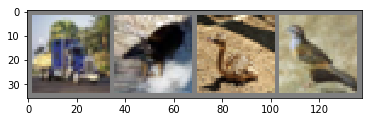

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # 把range从(-1,1)调整到(0，１)
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

grad_img = torchvision.utils.make_grid(images)

imshow(grad_img)

In [4]:
print(images.size(), labels.size())

torch.Size([4, 3, 32, 32]) torch.Size([4])


In [5]:
for i in range(len(labels)):
    print('%d : %s' % (i, classes[labels[i]]))

0 : truck
1 : deer
2 : bird
3 : bird


# Define Neural Network

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Net1(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, X):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(X)), (2,2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# Define a Loss Function and optimizer

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

# Train the network

In [11]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % ((epoch + 1), i + 1,
                  running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.194
[1,  4000] loss: 1.829
[1,  6000] loss: 1.657
[1,  8000] loss: 1.562
[1, 10000] loss: 1.511
[1, 12000] loss: 1.468
[2,  2000] loss: 1.405
[2,  4000] loss: 1.359
[2,  6000] loss: 1.334
[2,  8000] loss: 1.332
[2, 10000] loss: 1.304
[2, 12000] loss: 1.281
Finished Training


# Testing

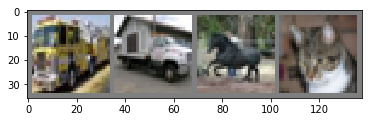

0 : truck
1 : truck
2 : horse
3 : cat


In [12]:
dataiterr = iter(testloader)
images, labels = dataiter.next()
grad_img = torchvision.utils.make_grid(images)
imshow(grad_img)
for i in range(len(labels)):
    print('%d : %s' % (i, classes[labels[i]]))

In [13]:
outputs = net(images)
print(outputs)

tensor([[-2.2202,  0.5023, -0.8021,  1.5556, -3.1334,  1.0927,  1.9738, -0.1613,
         -2.3240,  3.8973],
        [ 0.1821,  3.1605, -1.6163, -0.7868, -2.5871, -1.1114, -1.4225,  0.2097,
         -1.1995,  5.6179],
        [-1.1862, -1.3689,  1.2520,  0.5495,  0.3182,  0.7541, -0.1787,  1.3626,
         -1.7255, -1.2973],
        [-1.4799, -1.2242,  0.6592,  2.1542, -1.2177,  1.5229,  1.0336, -0.6814,
         -1.0123, -0.5667]], grad_fn=<AddmmBackward>)


In [14]:
_, predicted = torch.max(outputs, 1)
print(predicted)
for i, label in enumerate(predicted):
    print('%d : %s' % (i, classes[label]))

tensor([9, 9, 7, 3])
0 : truck
1 : truck
2 : horse
3 : cat


In [15]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        input, labels = data
        outputs = net(input)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
print('Accuracy: %d %%' % (100 * correct / total)) 

Accuracy: 53 %


# Training on GPU

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [17]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [19]:
print(optimizer.state[list(optimizer.state.keys())[0]])

for p in optimizer.state.keys():
    param_state = optimizer.state[p]
    buf = param_state["momentum_buffer"]
    param_state["momentum_buffer"] = buf.cuda()  # move buf to device

{'momentum_buffer': tensor([[[[ 4.4076e-02,  4.7815e-02,  3.5915e-02,  4.9473e-02,  1.0707e-01],
          [ 1.4244e-02,  1.7160e-02,  3.9732e-02,  1.0244e-01,  1.3629e-01],
          [ 4.2574e-02,  6.9927e-02,  1.3188e-01,  1.4486e-01,  9.8360e-02],
          [-4.8366e-02, -1.4411e-02,  5.0462e-02,  5.9783e-02,  6.7630e-02],
          [-3.7315e-02, -1.3843e-02,  3.3202e-02,  6.8048e-02,  8.3475e-02]],

         [[ 3.7088e-02,  9.3245e-03, -2.8638e-02, -2.2603e-02,  4.2313e-02],
          [ 2.2285e-02,  1.5256e-02,  8.2789e-03,  5.6590e-02,  7.2541e-02],
          [ 2.4753e-02,  4.4859e-02,  7.4203e-02,  8.4190e-02,  4.4812e-02],
          [-5.1356e-02, -3.4481e-02,  1.5389e-04, -3.5710e-03,  1.2302e-02],
          [-8.0904e-03, -6.1152e-03,  2.5952e-02,  4.3030e-02,  4.0943e-02]],

         [[-7.9344e-02, -9.8844e-02, -1.3315e-01, -1.3319e-01, -6.3697e-02],
          [-6.5396e-02, -7.3617e-02, -7.8235e-02, -3.3902e-02, -3.0378e-02],
          [-4.0072e-02, -3.5919e-02, -1.3441e-02,  6

In [20]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.198
[1,  4000] loss: 1.210
[1,  6000] loss: 1.223
[1,  8000] loss: 1.185
[1, 10000] loss: 1.185
[1, 12000] loss: 1.177
[2,  2000] loss: 1.080
[2,  4000] loss: 1.097
[2,  6000] loss: 1.104
[2,  8000] loss: 1.106
[2, 10000] loss: 1.102
[2, 12000] loss: 1.112
Finished Training
